In [1]:
import numpy as np
import os
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})

In [2]:
file_dir = 'dsprites-dataset'
file_name = 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
path = os.path.join(os.getcwd(), file_dir, file_name)
dataset_zip = np.load(path, encoding='latin1')
imgs = dataset_zip['imgs']
imgs_0 = imgs
imgs = np.reshape(imgs, (737280, 64*64)) # to transform it back, just use np.reshape(imgs, (737280, 64, 64))
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]

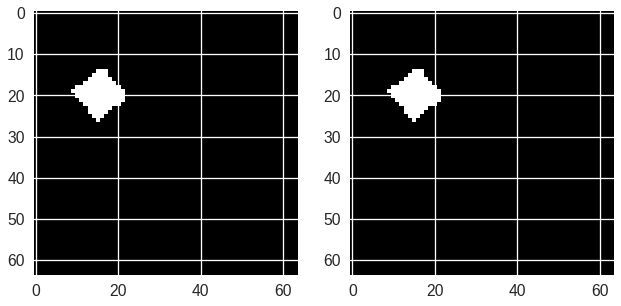

In [102]:
# test if the recovered images are the correct ones
nth = np.random.randint(0,70000)
nth = 14340

img_0 = imgs_0[nth]

imgs_recovered = np.reshape(imgs, (737280, 64, 64))
img = imgs_recovered[nth]

plt.subplot('121')
plt.imshow(img_0, cmap='Greys_r',  interpolation='nearest')
plt.subplot('122')
plt.imshow(img, cmap='Greys_r',  interpolation='nearest')

### Test with deepmind's code

In [3]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata['latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

def latent_to_index(latents):
      return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
      samples = np.zeros((size, latents_sizes.size))
        
      for lat_i, lat_size in enumerate(latents_sizes):
        samples[:, lat_i] = np.random.randint(lat_size, size=size)

      return samples

In [4]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
      ncols = int(np.ceil(num_images**0.5))
      nrows = int(np.ceil(num_images / ncols))
      _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
      axes = axes.flatten()

      for ax_i, ax in enumerate(axes):
        if ax_i < num_images:
          ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')          
          ax.set_xticks([])
          ax.set_yticks([])
        else:
          ax.axis('off')

def show_density(imgs):
      _, ax = plt.subplots()
      ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
      ax.grid('off')
      ax.set_xticks([])
      ax.set_yticks([])

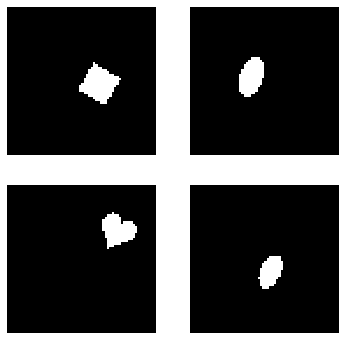

In [89]:
# Sample latents randomly
latents_sampled = sample_latent(size=5000)

# Test if the recovered images are the right ones
I = imgs_recovered

# Select images
indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = I[indices_sampled]

# Show images
show_images_grid(imgs_sampled, 4)